In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmaps

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [75]:
df = pd.read_csv('C:/Users/br_bo/Desktop/PINN_example2/predictions.csv')

# 选择第一个维度的数据，这里假设是 CSV 文件的第一列
# u
data1 = df.iloc[:, 0].values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
print(data1.shape)
reshaped_data1 = data1.reshape((3, 1, 201, 201))
# v
data2 = df.iloc[:, 1].values  # iloc[:, 0] 选择所有行的第一列，.values 转换为 numpy 数组
reshaped_data2 = data2.reshape((3, 1, 201, 201))

(121203,)


In [76]:
# 假设你的数据维度和范围
lon = np.linspace(180, 230, 201)  # 示例经度范围
lat = np.linspace(-4, 46, 201)    # 示例纬度范围
lon, lat = np.meshgrid(lon, lat)  # 创建经纬度的网格

# 假设 selected_u 和 selected_v 分别是在特定时间和层级的 U 和 V 分量的数据
selected_u = reshaped_data1[0, 0, :, :]
selected_v = reshaped_data2[0, 0, :, :]
wind_speed = np.sqrt(selected_v**2 + selected_u**2)

No handles with labels found to put in legend.


58.19788418934695
58.554128721206894
128.23079359089056
143.00266133374674
21.388167457217776
22.5180161812782
56.75778399680365
71.79155206197379
78.65965771131204
83.31978800926066
69.17465993890687
75.20319882905005
79.97637249760442
309.65894105555003


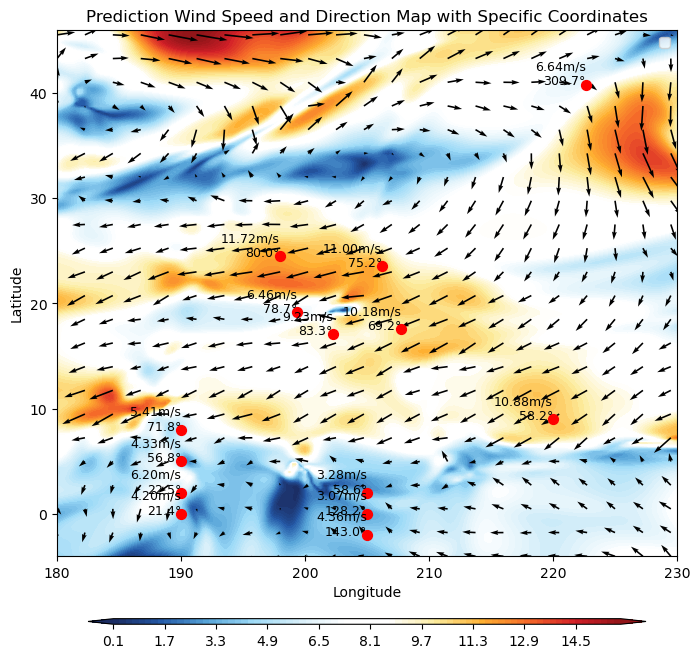

In [69]:
# 每隔几个数据点绘制一个箭头，以避免图像过于拥挤
skip = (slice(None, None, 9), slice(None, None, 9))
# 绘图
plt.figure(figsize=(8, 9))

# 绘制风速的等高线图
contourf = plt.contourf(lon, lat, wind_speed, levels=np.arange(np.min(wind_speed), np.max(wind_speed), 0.2), extend='both', cmap=cmaps.BlueWhiteOrangeRed)
cbar = plt.colorbar(contourf, orientation='horizontal', pad=0.09, shrink=0.9, aspect=90)

# 绘制风向的箭头图
plt.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip])

# 标记特定经纬度点
# 标记特定经纬度点
special_coords = [
    (9, 220), (2, 205), (0, 205), (-2, 205),
    (0, 190), (2, 190), (5, 190), (8, 190), 
    (19.143, 199.355), (17.07, 202.245), (17.538, 207.77),(23.528, 206.208), (24.475, 197.97), (40.764, 222.623)
]

for coord in special_coords:
    lon_idx = np.abs(lon[0] - coord[1]).argmin()
    lat_idx = np.abs(lat[:, 0] - coord[0]).argmin()
    u = selected_u[lat_idx, lon_idx]
    v = selected_v[lat_idx, lon_idx]
    speed = wind_speed[lat_idx, lon_idx]
    
    # 计算风向, 将其转换为度数
#     wind_direction = (np.degrees(np.arctan2(v, u))+360) % 360

    deg = 180.0/np.pi
    tmp = 270.0 - np.arctan2(v, u)*deg    
    wind_direction= np.mod(tmp,360.0)
    
#     if wind_direction < 180:
#         wind_direction += 180
#     elif wind_direction > 180:
#         wind_direction -= 180
    print(wind_direction)
    
    plt.scatter(coord[1], coord[0], color='red', s=50)  # 使用红色标记这些点
    plt.text(coord[1], coord[0], f'{speed:.2f}m/s\n{wind_direction:.1f}°', fontsize=9, ha='right', color='black')  # 标记风速和风向

plt.legend()
plt.title('Prediction Wind Speed and Direction Map with Specific Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

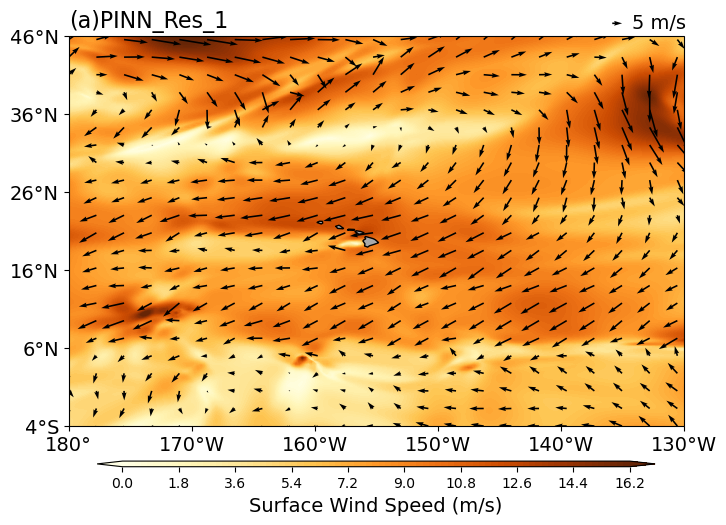

In [79]:
fig = plt.figure(figsize=(8, 6.5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([180, 230, -4, 46], crs=ccrs.PlateCarree())
# ax.set_extent([0, 20, -70, 70], crs=ccrs.PlateCarree())

# 每隔几个数据点绘制一个箭头，以避免图像过于拥挤
skip = (slice(None, None, 9), slice(None, None, 9))

contourf = plt.contourf(lon, lat, wind_speed, levels=np.arange(0, 16.4, 0.2),transform=ccrs.PlateCarree(), extend='both', cmap='YlOrBr')
cbar = plt.colorbar(contourf, orientation='horizontal', pad=0.07, shrink=0.9, aspect=90)
quiver = plt.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip],transform=ccrs.PlateCarree())



# 添加 5 m/s 的风速标注
qk = plt.quiverkey(quiver, X=0.82, Y=0.899, U=5, label='5 m/s', labelpos='E', coordinates='figure', )
qk.text.set_fontsize(14)  # 更改风速标注的字体大小
# 给色标命名
cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)

# 添加陆地和海洋，设置颜色
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='darkgrey', zorder=2)
ax.add_feature(cfeature.OCEAN, facecolor='white', zorder=0)
 

# 定义网格的间隔
lon_ticks = range(0, 51, 10)   # 90E 到 300E，每30度一个网格
lat_ticks = range(-4, 47, 10)   # -60 到 70，每30度一个网格
# 使用 matplotlib 设置刻度线
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree(central_longitude=180))
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
# 设置刻度线标签样式并显示大小
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 设置经纬度标签的字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.text(159.7, -2.3, 'Ⅴ', fontsize=17, color='black', fontname='Times New Roman', fontweight='bold',verticalalignment='bottom', horizontalalignment='left')

# plt.legend()
# plt.legend()
plt.title('(a)PINN_Res_1',fontsize = 16,loc='left')
ax.set_aspect(0.635)
plt.savefig('E:/PINN2/fig4/aPINN_Res_1.eps',format='eps',bbox_inches='tight')
# plt.savefig('E:/PINN/grl/gPINN_Res-ERA5.eps',format='eps',bbox_inches='tight')
# plt.savefig('E:/PINN/fig3/PINN_ResND-CCMP.png',bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.


240.71864887699076
258.14191866725014
306.62830461860216
316.2647425709015
200.86552241031518
193.5469369520432
248.21750757848952
284.1763791193981
254.12246208232278
244.6837056160776
231.07723329423698
217.48932975627588
256.5261773683665
161.71798051194082


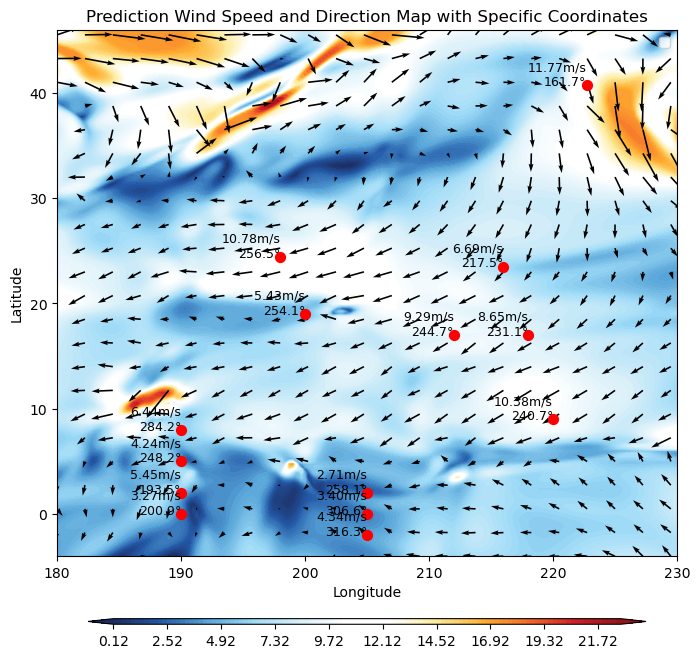

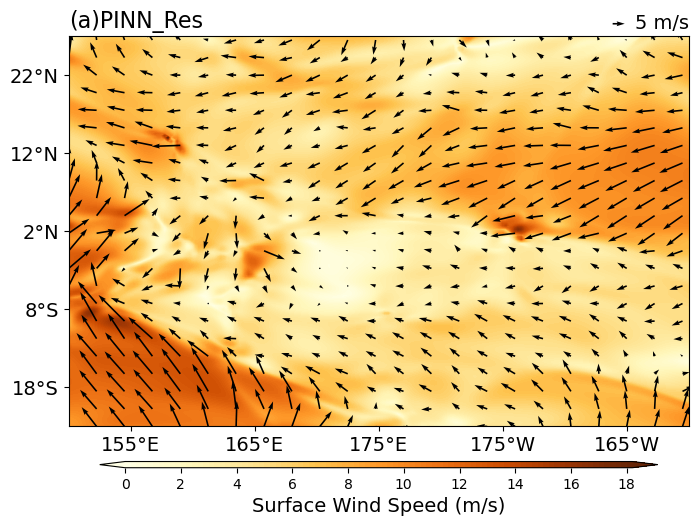

In [6]:
# 假设你的数据维度和范围
lon = np.linspace(150, 200, 201)  # 示例经度范围
lat = np.linspace(-23, 27, 201)    # 示例纬度范围
lon, lat = np.meshgrid(lon, lat)  # 创建经纬度的网格

# 假设 selected_u 和 selected_v 分别是在特定时间和层级的 U 和 V 分量的数据
selected_u = reshaped_data1[1, 0, :, :]
selected_v = reshaped_data2[0, 0, :, :]
wind_speed = np.sqrt(selected_v**2 + selected_u**2)

# 找到最大风速的位置
max_speed_index = np.unravel_index(np.argmax(wind_speed), wind_speed.shape)
max_speed_lon = lon[max_speed_index]
max_speed_lat = lat[max_speed_index]
max_speed = wind_speed[max_speed_index]

# 每隔几个数据点绘制一个箭头，以避免图像过于拥挤
skip = (slice(None, None, 9), slice(None, None, 9))
plt.figure(figsize=(8, 6.5))

contourf = plt.contourf(lon, lat, wind_speed, levels=np.arange(0, 18.4, 0.2), extend='both', cmap='YlOrBr')
cbar = plt.colorbar(contourf, orientation='horizontal', pad=0.07, shrink=0.9, aspect=90)
quiver = plt.quiver(lon[skip], lat[skip], selected_u[skip], selected_v[skip])



# 添加 5 m/s 的风速标注
qk = plt.quiverkey(quiver, X=0.82, Y=0.899, U=5, label='5 m/s', labelpos='E', coordinates='figure', )
qk.text.set_fontsize(14)  # 更改风速标注的字体大小
# 给色标命名
cbar.set_label('Surface Wind Speed (m/s)', fontsize=14)


# 自定义坐标轴刻度，从中心位置标注
xticks = np.arange(150, 200, 10) + 5  # 让刻度从中心位置开始
yticks = np.arange(-23, 27, 10) + 5
plt.xticks(xticks, fontsize=14)  # 增大x轴刻度字体
plt.yticks(yticks, fontsize=14)  # 增大y轴刻度字体

# 设置经度格式，根据经度值判断是东经还是西经
def format_longitude(x, pos):
    if x > 180:
        return f'{-x+360}°W'
    else:
        return f'{x}°E'

# 设置纬度格式，根据纬度值判断是北纬还是南纬
def format_latitude(y, pos):
    if y < 0:
        return f'{abs(y)}°S'
    else:
        return f'{y}°N'

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(format_longitude))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_latitude))

# plt.legend()
plt.title('(a)PINN_Res',fontsize = 16,loc='left')

# plt.savefig('E:/PINN/fig3/重建图2.eps',format='eps',bbox_inches='tight')
# plt.savefig('E:/PINN/fig3/重建图2-无细节.png',bbox_inches='tight')
plt.show()